In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# 1. Load the CSV file
df = pd.read_csv("Nat_Gas.csv")

In [3]:
print(df)

       Dates  Prices
0   10/31/20   10.10
1   11/30/20   10.30
2   12/31/20   11.00
3    1/31/21   10.90
4    2/28/21   10.90
5    3/31/21   10.90
6    4/30/21   10.40
7    5/31/21    9.84
8    6/30/21   10.00
9    7/31/21   10.10
10   8/31/21   10.30
11   9/30/21   10.20
12  10/31/21   10.10
13  11/30/21   11.20
14  12/31/21   11.40
15   1/31/22   11.50
16   2/28/22   11.80
17   3/31/22   11.50
18   4/30/22   10.70
19   5/31/22   10.70
20   6/30/22   10.40
21   7/31/22   10.50
22   8/31/22   10.40
23   9/30/22   10.80
24  10/31/22   11.00
25  11/30/22   11.60
26  12/31/22   11.60
27   1/31/23   12.10
28   2/28/23   11.70
29   3/31/23   12.00
30   4/30/23   11.50
31   5/31/23   11.20
32   6/30/23   10.90
33   7/31/23   11.40
34   8/31/23   11.10
35   9/30/23   11.50
36  10/31/23   11.80
37  11/30/23   12.20
38  12/31/23   12.80
39   1/31/24   12.60
40   2/29/24   12.40
41   3/31/24   12.70
42   4/30/24   12.10
43   5/31/24   11.40
44   6/30/24   11.50
45   7/31/24   11.60
46   8/31/24 

In [6]:
# Rename columns to standard format
df.columns = ["Date", "Price"]

In [7]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# Sort by date
df = df.sort_values("Date").reset_index(drop=True)

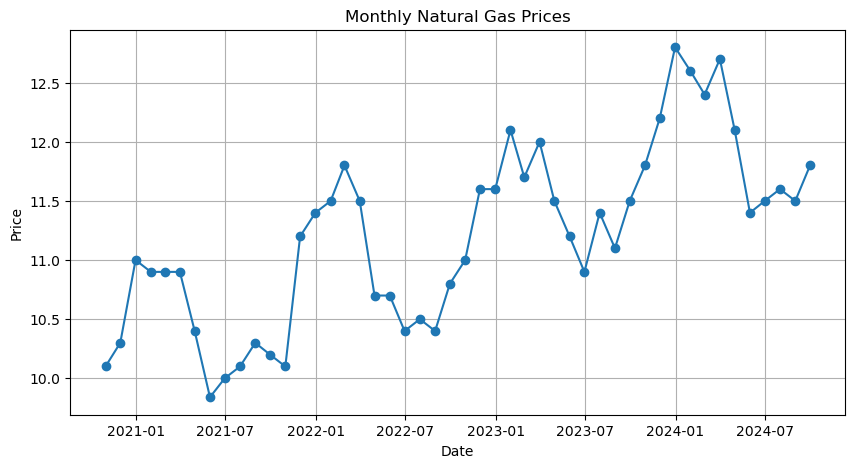

In [9]:
# 2. Visualize historical prices
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Price"], marker="o")
plt.title("Monthly Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [10]:
# 3. Identify seasonality
df["Month"] = df["Date"].dt.month
monthly_avg = df.groupby("Month")["Price"].mean()
overall_avg = df["Price"].mean()

In [11]:
# 4. Interpolation setup
df["Date_ordinal"] = df["Date"].map(pd.Timestamp.toordinal)

price_interpolator = interp1d(
    df["Date_ordinal"],
    df["Price"],
    kind="linear",
    fill_value="extrapolate"
)

In [12]:
# 5. Price estimation function
def estimate_price(input_date):
    """
    Estimate natural gas price for any given date
    """
    input_date = pd.to_datetime(input_date)
    ordinal = input_date.toordinal()

    # Base interpolated price
    base_price = float(price_interpolator(ordinal))

    # Seasonal adjustment
    month = input_date.month
    seasonal_adjustment = monthly_avg[month] - overall_avg

    return base_price + seasonal_adjustment

In [13]:
# 6. Extrapolate 1 year forward
future_dates = pd.date_range(
    start=df["Date"].max(),
    periods=12,
    freq="M"
)

future_prices = [estimate_price(date) for date in future_dates]

future_df = pd.DataFrame({
    "Date": future_dates,
    "Estimated Price": future_prices
})

C:\Users\HP\AppData\Local\Temp\ipykernel_11772\2434585499.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


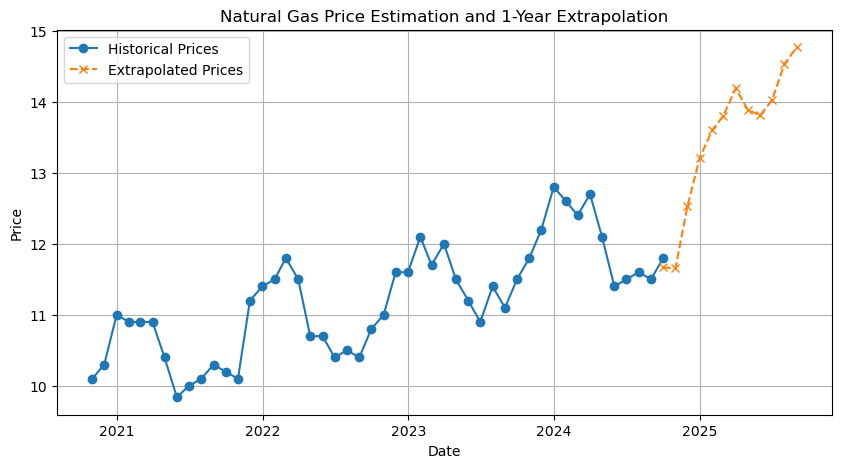

In [14]:
# 7. Plot historical + future
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Price"], label="Historical Prices", marker="o")
plt.plot(future_df["Date"], future_df["Estimated Price"],
         label="Extrapolated Prices", linestyle="--", marker="x")
plt.title("Natural Gas Price Estimation and 1-Year Extrapolation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# 8. Example usage
print("Estimated price on 2025-02-15:", estimate_price("2025-02-15"))

Estimated price on 2025-02-15: 13.672916666666671
